### Project Name: Theoretical Research: Glucose Detection in Solution using Ultrasonic Sensors

#### Water Quantity and Sugar Concentration

1. **Water Quantity**: 100 mL
2. **Sugar Concentration**: Based on normal human glucose levels
3. **Sensor**: CMUT
4. **Material**: Borosilicate glass 


### Converting Blood Glucose Concentration to Sugar Water Solution

Given that 1 dL (deciliter) is 100 mL, the glucose concentrations in mg/dL directly translate to mg of sugar per 100 mL of water.

### Sugar Concentrations for Simulation:

- **Normal Fasting Range**: 70-99 mg of glucose per 100 mL of water
- **Pre-Diabetes Fasting Range**: 100-125 mg of glucose per 100 mL of water
- **Diabetes Fasting Range**: 126 mg and above of glucose per 100 mL of water
- **Normal Postprandial Range**: Less than 140 mg of glucose per 100 mL of water
- **Pre-Diabetes Postprandial Range**: 140-199 mg of glucose per 100 mL of water
- **Diabetes Postprandial Range**: 200 mg and above of glucose per 100 mL of water



key differences between sine and square waveforms in the context of ultrasonic wave propagation in glucose solutions:

| Feature                  | Sine Wave                           | Square Wave                         |
|--------------------------|--------------------------------------|-------------------------------------|
| **Waveform Shape**       | Smooth, continuous oscillation       | Alternating on-off pattern          |
| **Frequency Content**    | Single fundamental frequency         | Fundamental frequency + harmonics   |
| **Energy Distribution**  | Concentrated at fundamental frequency| Spread across fundamental and harmonics|
| **Interaction with Medium** | Direct and straightforward         | Complex due to multiple frequencies |
| **Sensitivity to Changes** | Clear correlation with concentration| More sensitive, complex interpretation|
| **Waveform Generation**  | Easier to generate and analyze       | Higher power, more complex to analyze|
| **Practical Use**        | Preferred for precise measurements   | Used for detecting complex interactions|

### Implications for Ultrasonic Measurements in Glucose Solutions:
- **Sine Wave**: Easier to interpret changes in velocity directly related to glucose concentration.
- **Square Wave**: Potentially richer data due to harmonics but requires more complex analysis.


# Comparative Analysis of Vessel Materials for Ultrasonic Measurements:


Reflection Coefficients (Water/Material):
Steel: 0.8780
Glass: 0.6198
Polymer: 0.1471


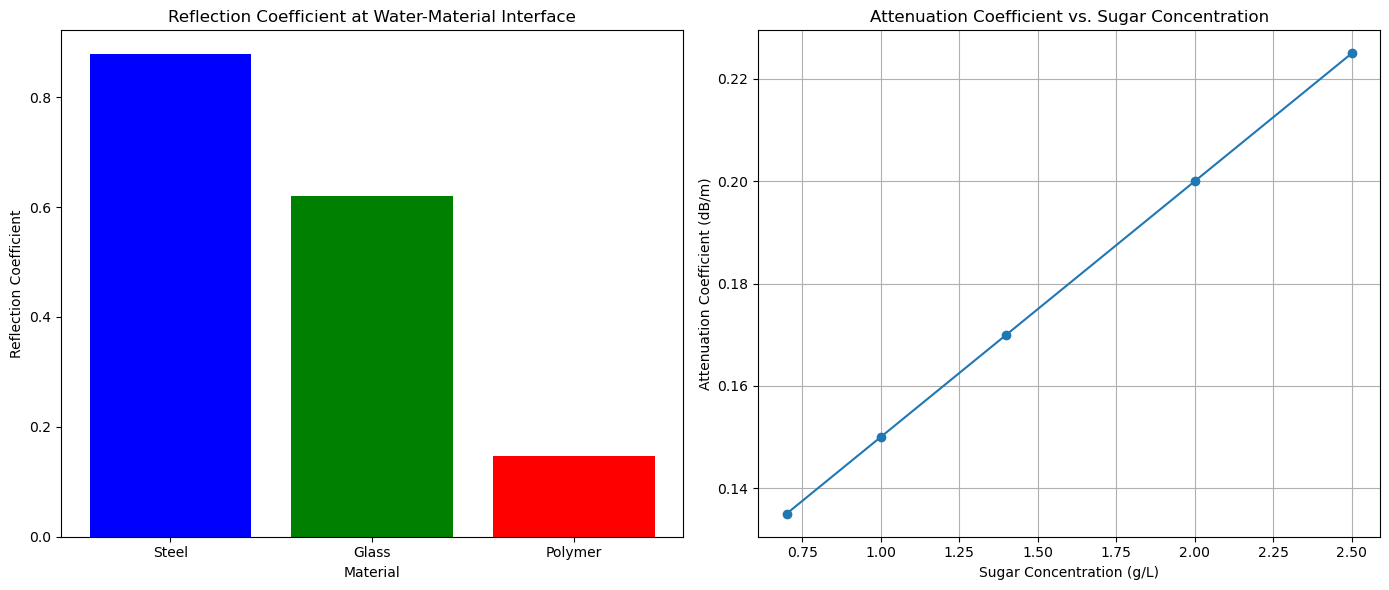

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha_0 = 0.1  # Baseline attenuation coefficient for pure water (dB/m)
k = 0.05  # Attenuation coefficient per unit concentration (dB/(m·g/L))

# Acoustic Impedance Calculation
density_water = 1000  # kg/m³
velocity_water = 1497  # m/s
Z_water = density_water * velocity_water  # Acoustic impedance of water

# Material properties
materials = {
    "Steel": {"density": 7800, "velocity": 5900},
    "Glass": {"density": 2230, "velocity": 5640},
    "Polymer": {"density": 1400, "velocity": 2400}
}

def reflection_coefficient(Z1, Z2):
    return ((Z2 - Z1) / (Z2 + Z1))**2

# Calculate reflection coefficients for each material
reflection_coeffs = {}
for material, properties in materials.items():
    Z_material = properties["density"] * properties["velocity"]
    reflection_coeffs[material] = reflection_coefficient(Z_water, Z_material)

# Display reflection coefficients
print("Reflection Coefficients (Water/Material):")
for material, coeff in reflection_coeffs.items():
    print(f"{material}: {coeff:.4f}")

# Function to calculate attenuation coefficient
def attenuation_coefficient(G):
    return alpha_0 + k * G

# sugar concentrations in g/L
sugar_concentrations_g_per_L = np.array([0.7, 1.0, 1.4, 2.0, 2.5])

# Generate data for attenuation coefficients
attenuations = attenuation_coefficient(sugar_concentrations_g_per_L)

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Sugar Concentration (g/L)": sugar_concentrations_g_per_L,
    "Attenuation Coefficient (dB/m)": attenuations
})

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Reflection Coefficients
materials_list = list(materials.keys())
reflection_values = [reflection_coeffs[material] for material in materials_list]
ax[0].bar(materials_list, reflection_values, color=['blue', 'green', 'red'])
ax[0].set_xlabel('Material')
ax[0].set_ylabel('Reflection Coefficient')
ax[0].set_title('Reflection Coefficient at Water-Material Interface')

# Plot Attenuation Coefficient vs. Sugar Concentration
ax[1].plot(df["Sugar Concentration (g/L)"], df["Attenuation Coefficient (dB/m)"], marker='o')
ax[1].set_xlabel('Sugar Concentration (g/L)')
ax[1].set_ylabel('Attenuation Coefficient (dB/m)')
ax[1].set_title('Attenuation Coefficient vs. Sugar Concentration')

plt.grid(True)
plt.tight_layout()
plt.show()


## Which Material is Best? : 

Polymer: Provides the best transmission efficiency due to its low reflection coefficient, making it ideal for precise ultrasonic measurements, although it may be less durable than steel.
Measurement Sensitivity:

The sensitivity of the ultrasonic measurement to changes in sugar concentration can be optimized by using materials with low reflection coefficients like polymer, ensuring more energy is transmitted and detected.


## Implementing Research Paper: 

##### Concentration Detection in Water-Glucose Mixtures for Medical Applications Using Ultrasonic Velocity Measurements

by: U. Schwerthoeffer, M. Winter, R. Weigel, and D. Kissinger
Institute for Electronics Engineering
University of Erlangen-Nuremberg, Germany, Cauerstr. 9, 9lO58-Erlangen
Email: {schwerthoeffer, weigel, kissinger }@lte.eei.uni-erlangen.de



volume_glucose 4.481434058898847e-08 total_volume 0.00010004481434058899
phi_glucose 0.0004479426633390926
chi_mix 4.5629551417418573e-10
rho_mix 1000.2517437767966
volume_glucose 5.7618437900128033e-08 total_volume 0.00010005761843790013
phi_glucose 0.0005758525817390747
chi_mix 4.5623712329643614e-10
rho_mix 1000.3236291509374
volume_glucose 7.04225352112676e-08 total_volume 0.00010007042253521127
phi_glucose 0.0007037297677691765
chi_mix 4.5617874736101336e-10
rho_mix 1000.3954961294863
volume_glucose 8.322663252240716e-08 total_volume 0.00010008322663252241
phi_glucose 0.0008315742339921958
chi_mix 4.5612038636218256e-10
rho_mix 1000.4673447195037
volume_glucose 9.603072983354673e-08 total_volume 0.00010009603072983355
phi_glucose 0.0009593859929645026
chi_mix 4.5606204029421167e-10
rho_mix 1000.5391749280461
volume_glucose 1.0883482714468629e-07 total_volume 0.0001001088348271447
phi_glucose 0.0010871650572360425
chi_mix 4.5600370915137174e-10
rho_mix 1000.6109867621667
volume_glu

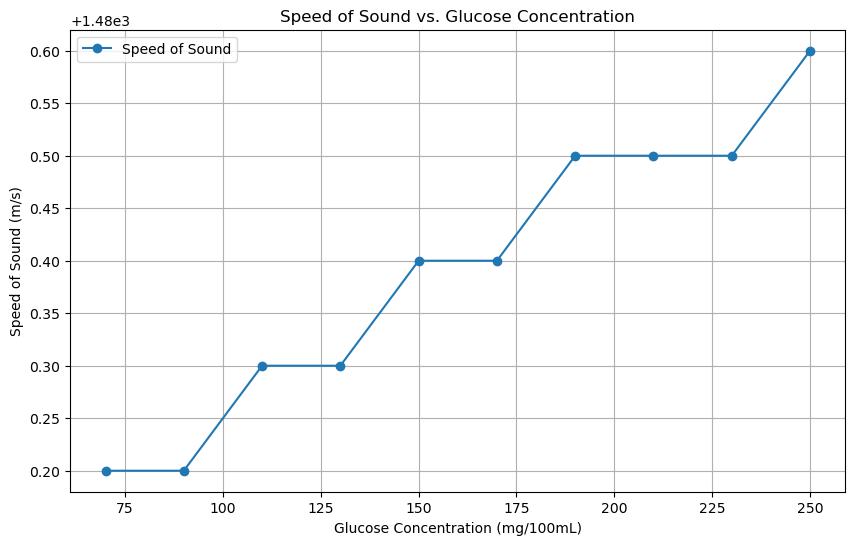

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sugar concentrations in mg/100mL
glucose_concentration = np.array([70, 90, 110, 130, 150, 170, 190, 210, 230, 250])

# Constants
density_water = 1000  # kg/m³
density_glucose = 1562  # kg/m³
compressibility_water = 4.565e-10  # Pa⁻¹
volume_water = 0.1 * 10**-3  # m³ (100 ml)

data = []
phi_waters = []

v_glucose = [mass/density_glucose for mass in glucose_concentration]
for v_g in v_glucose:
    p_w = volume_water/ (volume_water + v_g)
    phi_waters.append(p_w)


# Calculation for each glucose concentration
for index,glucose in enumerate(glucose_concentration):
    mass_glucose = glucose * 1e-6  # converting mg to kg
    volume_glucose = mass_glucose / density_glucose  # m³
    total_volume = volume_water + volume_glucose
    print("volume_glucose", volume_glucose, "total_volume",total_volume)
    


    # Volume fractions
    phi_glucose = volume_glucose / total_volume
    phi_water = (volume_water)/(volume_water+volume_glucose)
    
    # Density and compressibility of the mixture
    rho_mix = phi_water * density_water + phi_glucose * density_glucose
    chi_mix = phi_water * compressibility_water  # compressibility of glucose is considered 0
    print("phi_glucose",phi_glucose)
    print("chi_mix",chi_mix)
    print("rho_mix",rho_mix)
    # Speed of sound in the mixture
    speed_of_sound = np.sqrt(1 / (rho_mix * chi_mix))
    
    # Append results 
    data.append([glucose, round(speed_of_sound, 1)])

#DataFrame 
df = pd.DataFrame(data, columns=['Glucose_Concentration_mg_100mL', 'Speed_of_Sound_m_s'])

# Print the DataFrame
print(df)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df['Glucose_Concentration_mg_100mL'], df['Speed_of_Sound_m_s'], label='Speed of Sound', marker='o')
plt.title('Speed of Sound vs. Glucose Concentration')
plt.xlabel('Glucose Concentration (mg/100mL)')
plt.ylabel('Speed of Sound (m/s)')
plt.legend()
plt.grid(True)
plt.show()




### Research Paper Implementation:
**A Miniaturized Ultrasonic Sugar Concentration Detection System Based on Piezoelectric Micromachined Ultrasonic Transducers**

Lei Shi , Licheng Jia , Chongbin Liu , Chengliang Sun , Member, IEEE,
Sheng Liu , Fellow, IEEE, and Guoqiang Wu , Senior Member, IEEE

### Theoretical Explanation:

#### Why Ultrasonic Velocity Increases with Sugar Concentration:
Ultrasonic velocity in a liquid is influenced by the liquid’s density and compressibility. When sugar is dissolved in water, the density of the solution increases, and its compressibility decreases due to the strengthening of hydrogen bonds between sugar molecules and water. This results in an increase in ultrasonic velocity because the denser and less compressible medium allows sound waves to travel faster.

#### Relation to Temperature:
Ultrasonic velocity is also temperature-dependent. As temperature increases, the density of the liquid generally decreases, and its compressibility changes. These changes affect the speed at which sound waves propagate through the medium. Typically, ultrasonic velocity increases with temperature due to the reduction in density outweighing the effects of changes in compressibility.

### Key Findings:
1. **System Design and Performance**:
   - The developed system uses an 8 × 9 PMUT array and a TDC1000 ultrasonic sensing analog front end.
   - It achieves a response time of less than 1 second, an accuracy of 1.4%, and a resolution of 0.6%.

2. **Experimental Observations**:
   - Ultrasonic velocity increases linearly with sugar concentration and temperature.
   - The developed system can be used effectively in the food industry for real-time monitoring of sugar concentration.





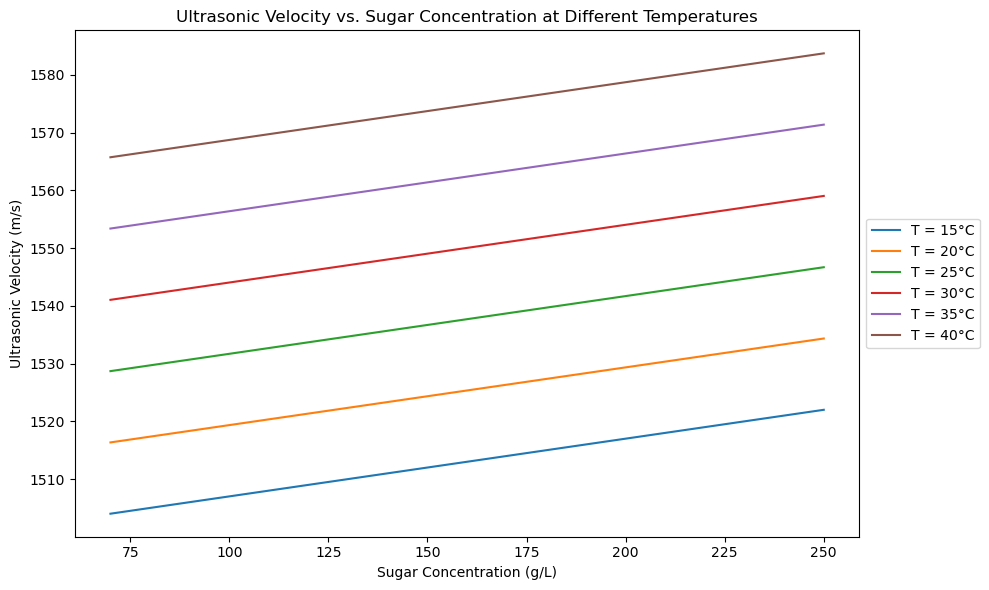

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
rho_w = 1000  # Density of water (kg/m^3)
rho_s = 1586  # Density of sugar (kg/m^3)
c_0 = 1497  # Initial ultrasonic velocity in water (m/s)
k_T = 2.47  # Temperature coefficient (m/s)/°C
k_G = 0.1   # Concentration coefficient (m/s)/(g/L)

def ultrasonic_velocity(G, T):
    c = c_0 + k_G * G + k_T * (T - 15)
    return c

# sugar concentrations in g/L
sugar_concentrations_g_per_L = [70, 90, 110, 130, 150, 170, 190, 210, 230, 250]

temperatures = np.linspace(15, 40, 26)  # Temperature range from 15°C to 40°C

# Generate data
data = []

for G in sugar_concentrations_g_per_L:
    for T in temperatures:
        c = ultrasonic_velocity(G, T)
        data.append([G, T, c])

df = pd.DataFrame(data, columns=["Sugar Concentration (g/L)", "Temperature (°C)", "Ultrasonic Velocity (m/s)"])

# Save to CSV
df.to_csv("ultrasonic_velocity_data.csv", index=False)

fig, ax = plt.subplots(figsize=(10, 6))

representative_temperatures = [15, 20, 25, 30, 35, 40]
for T in representative_temperatures:
    subset = df[df["Temperature (°C)"] == T]
    ax.plot(subset["Sugar Concentration (g/L)"], subset["Ultrasonic Velocity (m/s)"], label=f'T = {T}°C')

ax.set_xlabel('Sugar Concentration (g/L)')
ax.set_ylabel('Ultrasonic Velocity (m/s)')
ax.set_title('Ultrasonic Velocity vs. Sugar Concentration at Different Temperatures')

# Move legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


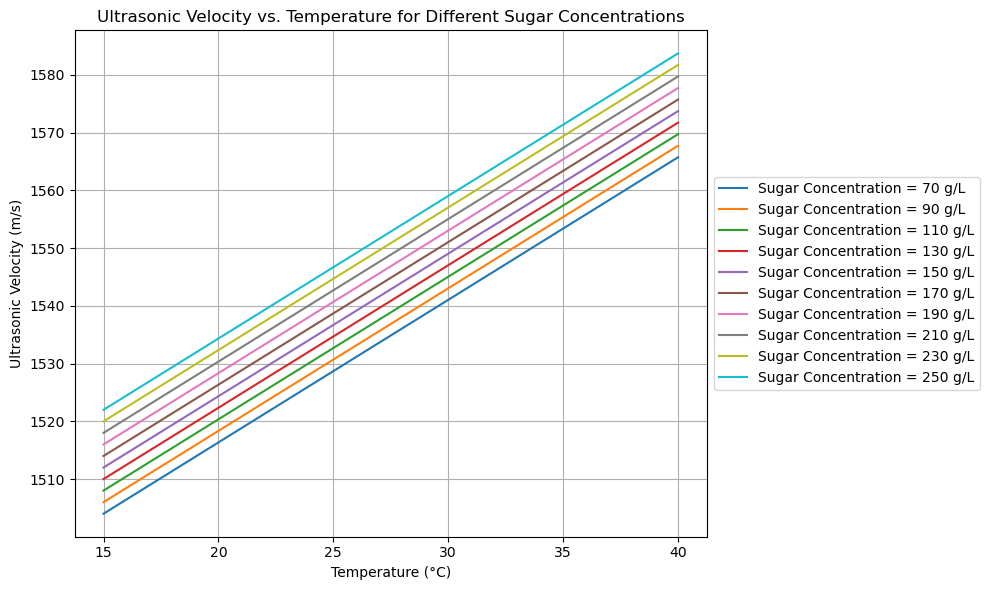

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
rho_w = 1000  # Density of water (kg/m^3)
rho_s = 1586  # Density of sugar (kg/m^3)
c_0 = 1497  # Initial ultrasonic velocity in water (m/s)
k_T = 2.47  # Temperature coefficient (m/s)/°C
k_G = 0.1   # Concentration coefficient (m/s)/(g/L)

# Function to calculate ultrasonic velocity
def ultrasonic_velocity(G, T):
    c = c_0 + k_G * G + k_T * (T - 15)
    return c

# Define sugar concentrations in g/L
sugar_concentrations_g_per_L = [70, 90, 110, 130, 150, 170, 190, 210, 230, 250]

# Define temperature range
temperatures = np.linspace(15, 40, 26)  # Temperature range from 15°C to 40°C

# Generate data
data = []

for G in sugar_concentrations_g_per_L:
    for T in temperatures:
        c = ultrasonic_velocity(G, T)
        data.append([G, T, c])

df = pd.DataFrame(data, columns=["Sugar Concentration (g/L)", "Temperature (°C)", "Ultrasonic Velocity (m/s)"])

# Save to CSV
df.to_csv("ultrasonic_velocity_vs_temperature.csv", index=False)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

for G in sugar_concentrations_g_per_L:
    subset = df[df["Sugar Concentration (g/L)"] == G]
    ax.plot(subset["Temperature (°C)"], subset["Ultrasonic Velocity (m/s)"], label=f'Sugar Concentration = {G} g/L')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Ultrasonic Velocity (m/s)')
ax.set_title('Ultrasonic Velocity vs. Temperature for Different Sugar Concentrations')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)
plt.tight_layout()
plt.show()


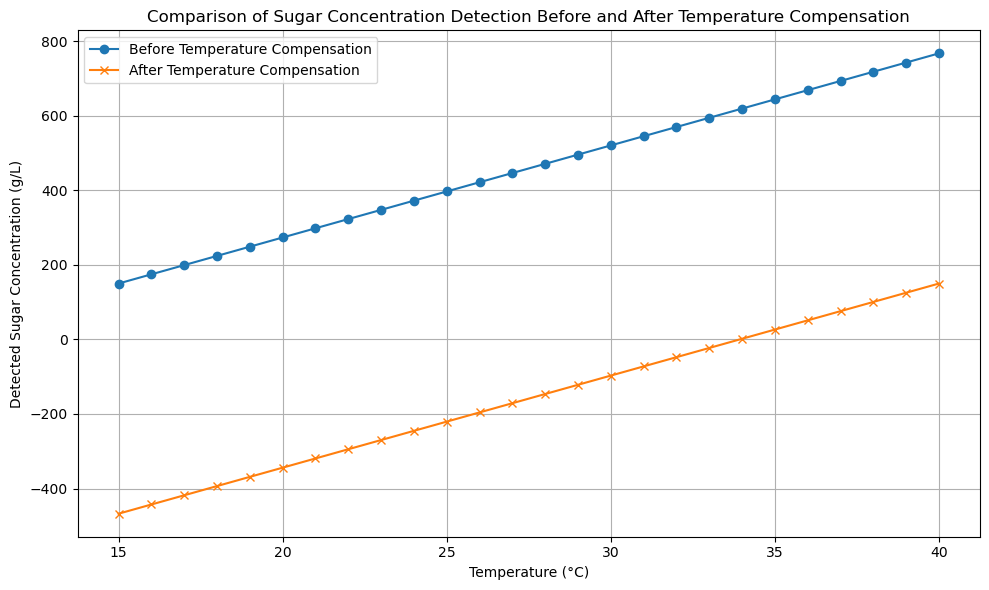

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
rho_w = 1000  # Density of water (kg/m^3)
rho_s = 1586  # Density of sugar (kg/m^3)
c_0 = 1497  # Initial ultrasonic velocity in water (m/s)
k_T = 2.47  # Temperature coefficient (m/s)/°C
k_G = 0.1   # Concentration coefficient (m/s)/(g/L)

# Function to calculate ultrasonic velocity
def ultrasonic_velocity(G, T):
    return c_0 + k_G * G + k_T * (T - 15)

# Function to calculate sugar concentration from ultrasonic velocity and temperature
def sugar_concentration(c, T):
    return (c - c_0 - k_T * (T - 15)) / k_G

# Define sugar concentration and temperature range
actual_sugar_concentration = 150  # Actual sugar concentration in g/L
temperatures = np.linspace(15, 40, 26)  # Temperature range from 15°C to 40°C

# Generate data for actual sugar concentration
velocities = [ultrasonic_velocity(actual_sugar_concentration, T) for T in temperatures]

# Calculate detected sugar concentration before and after temperature compensation
detected_concentration_before = [sugar_concentration(v, 15) for v in velocities]  # Without temperature compensation
detected_concentration_after = [sugar_concentration(v, T) for v in velocities]  # With temperature compensation

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Temperature (°C)": temperatures,
    "Detected Concentration Before (g/L)": detected_concentration_before,
    "Detected Concentration After (g/L)": detected_concentration_after
})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df["Temperature (°C)"], df["Detected Concentration Before (g/L)"], label='Before Temperature Compensation', marker='o')
ax.plot(df["Temperature (°C)"], df["Detected Concentration After (g/L)"], label='After Temperature Compensation', marker='x')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Detected Sugar Concentration (g/L)')
ax.set_title('Comparison of Sugar Concentration Detection Before and After Temperature Compensation')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


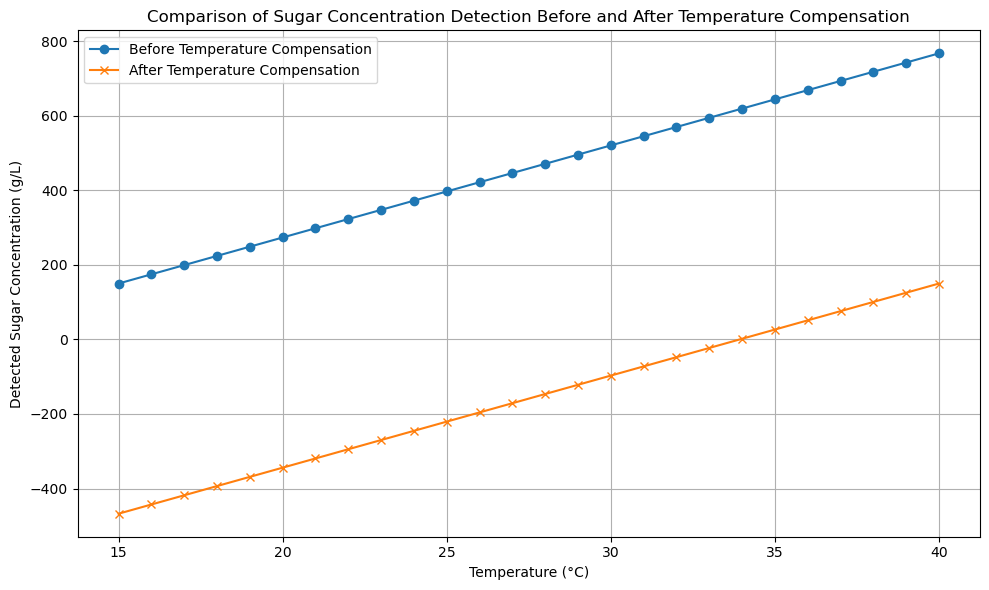

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
distance = 0.08  # Distance in meters (8 cm)
c_0 = 1497  # Initial ultrasonic velocity in water at 15°C (m/s)
k_T = 2.47  # Temperature coefficient (m/s)/°C
k_G = 0.1   # Concentration coefficient (m/s)/(g/L)

# Function to calculate TOF-based ultrasonic velocity
def ultrasonic_velocity_tof(distance, tof):
    return distance / tof

# Function to calculate TOF for given velocity and distance
def tof_from_velocity(distance, velocity):
    return distance / velocity

# Function to calculate sugar concentration from ultrasonic velocity and temperature
def sugar_concentration(c, T):
    return (c - c_0 - k_T * (T - 15)) / k_G

# Define sugar concentration and temperature range
actual_sugar_concentration = 150  # Actual sugar concentration in g/L
temperatures = np.linspace(15, 40, 26)  # Temperature range from 15°C to 40°C

# Generate data for actual sugar concentration
velocities = [c_0 + k_G * actual_sugar_concentration + k_T * (T - 15) for T in temperatures]
tofs = [tof_from_velocity(distance, v) for v in velocities]

# Calculate detected sugar concentration before and after temperature compensation
detected_concentration_before = [sugar_concentration(ultrasonic_velocity_tof(distance, tof), 15) for tof in tofs]  # Without temperature compensation
detected_concentration_after = [sugar_concentration(ultrasonic_velocity_tof(distance, tof), T) for tof in tofs]  # With temperature compensation

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Temperature (°C)": temperatures,
    "Detected Concentration Before (g/L)": detected_concentration_before,
    "Detected Concentration After (g/L)": detected_concentration_after
})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df["Temperature (°C)"], df["Detected Concentration Before (g/L)"], label='Before Temperature Compensation', marker='o')
ax.plot(df["Temperature (°C)"], df["Detected Concentration After (g/L)"], label='After Temperature Compensation', marker='x')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Detected Sugar Concentration (g/L)')
ax.set_title('Comparison of Sugar Concentration Detection Before and After Temperature Compensation')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


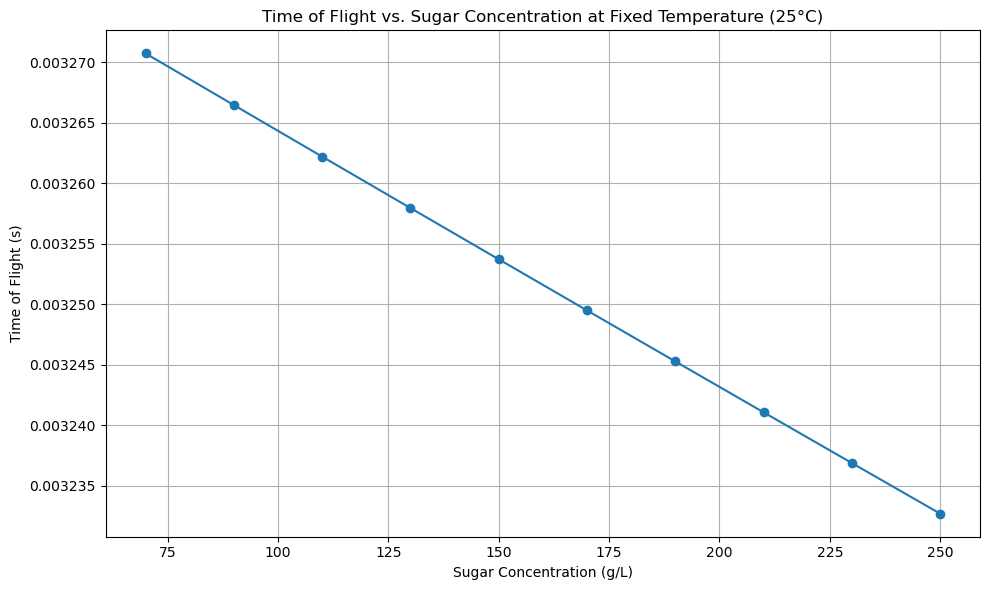

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
distance = 0.05  # Distance in meters (5 cm)
c_0 = 1497  # Initial ultrasonic velocity in water at 15°C (m/s)
k_T = 2.47  # Temperature coefficient (m/s)/°C
k_G = 0.1   # Concentration coefficient (m/s)/(g/L)
fixed_temperature = 25  # Fixed temperature in °C for this plot

# Function to calculate ultrasonic velocity
def ultrasonic_velocity(G, T):
    return c_0 + k_G * G + k_T * (T - 15)

# Function to calculate TOF from velocity and distance
def tof_from_velocity(distance, velocity):
    return distance / velocity

# Define sugar concentrations in g/L
sugar_concentrations_g_per_L = [70, 90, 110, 130, 150, 170, 190, 210, 230, 250]

# Generate data for TOF at a fixed temperature
tofs = [tof_from_velocity(distance, ultrasonic_velocity(G, fixed_temperature)) for G in sugar_concentrations_g_per_L]

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Sugar Concentration (g/L)": sugar_concentrations_g_per_L,
    "TOF (s)": tofs
})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df["Sugar Concentration (g/L)"], df["TOF (s)"], marker='o')

ax.set_xlabel('Sugar Concentration (g/L)')
ax.set_ylabel('Time of Flight (s)')
ax.set_title('Time of Flight vs. Sugar Concentration at Fixed Temperature (25°C)')

plt.grid(True)
plt.tight_layout()
plt.show()


### Time of Flight vs. Sugar Concentration in a 60% Water and 40% Glycerin Solution

This plot shows the relationship between Time of Flight (TOF) and sugar concentration in a solution of 60% water and 40% glycerin at a fixed temperature of 25°C.

#### Why TOF Decreases with Increasing Sugar Concentration:
- **Ultrasonic Velocity Increase**: The ultrasonic velocity in the sugar solution increases with higher sugar concentration due to changes in the density and compressibility of the solution.
- **Inverse Relationship**: TOF is inversely proportional to ultrasonic velocity (\(c\)), given by the formula:
  \[
  \text{TOF} = \frac{d}{c}
  \]
  where \(d\) is the distance the sound wave travels.
- **Result**: As the sugar concentration increases, the ultrasonic velocity increases, resulting in a decrease in TOF.

The following plot shows the 


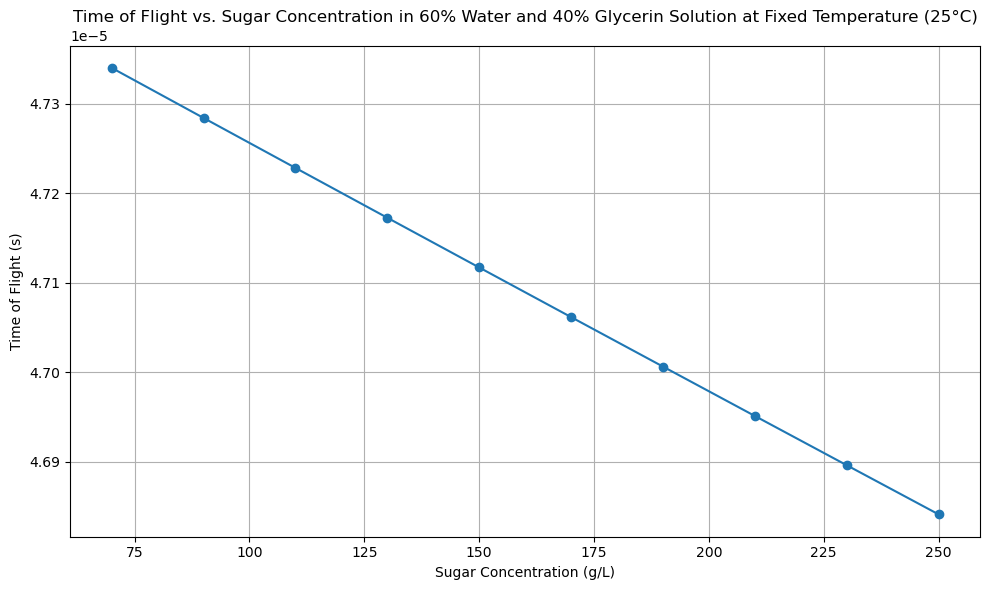

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
distance = 0.08  # Distance in meters (8 cm)
rho_w = 1000  # Density of water (kg/m^3)
rho_g = 1261  # Density of glycerin (kg/m^3)
c_0_water = 1497  # Initial ultrasonic velocity in water at 15°C (m/s)
c_0_glycerin = 1900  # Initial ultrasonic velocity in glycerin at 15°C (m/s) (approximate value)
k_T = 2.47  # Temperature coefficient (m/s)/°C
k_G = 0.1   # Concentration coefficient (m/s)/(g/L)
fixed_temperature = 25  # Fixed temperature in °C for this plot

# Calculate the density of the water-glycerin mixture
rho_mix = 0.6 * rho_w + 0.4 * rho_g

# Simplifying the mixture velocity calculation by assuming linearity
c_0_mix = 0.6 * c_0_water + 0.4 * c_0_glycerin

def ultrasonic_velocity_mixture(G, T):
    return c_0_mix + k_G * G + k_T * (T - 15)

def tof_from_velocity(distance, velocity):
    return distance / velocity

sugar_concentrations_g_per_L = [70, 90, 110, 130, 150, 170, 190, 210, 230, 250]

# Generate data for TOF at a fixed temperature in the water-glycerin mixture
tofs = [tof_from_velocity(distance, ultrasonic_velocity_mixture(G, fixed_temperature)) for G in sugar_concentrations_g_per_L]

df = pd.DataFrame({
    "Sugar Concentration (g/L)": sugar_concentrations_g_per_L,
    "TOF (s)": tofs
})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df["Sugar Concentration (g/L)"], df["TOF (s)"], marker='o')

ax.set_xlabel('Sugar Concentration (g/L)')
ax.set_ylabel('Time of Flight (s)')
ax.set_title('Time of Flight vs. Sugar Concentration in 60% Water and 40% Glycerin Solution at Fixed Temperature (25°C)')

plt.grid(True)
plt.tight_layout()
plt.show()


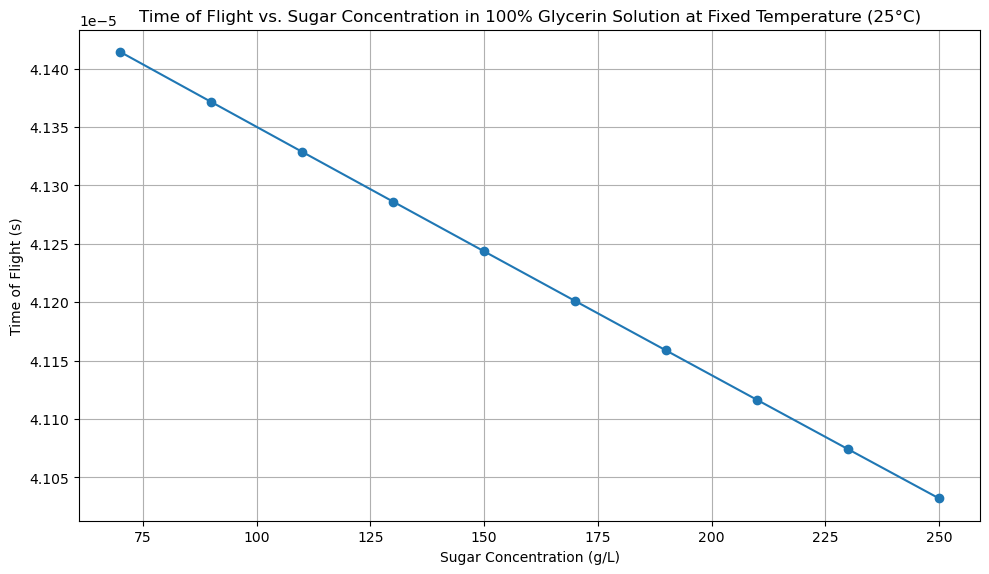

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
distance = 0.08  # Distance in meters (8 cm)
c_0_glycerin = 1900  # Initial ultrasonic velocity in glycerin at 15°C (m/s) (approximate value)
k_T = 2.47  # Temperature coefficient (m/s)/°C
k_G = 0.1   # Concentration coefficient (m/s)/(g/L)
fixed_temperature = 25  # Fixed temperature in °C for this plot

def ultrasonic_velocity_glycerin(G, T):
    return c_0_glycerin + k_G * G + k_T * (T - 15)

def tof_from_velocity(distance, velocity):
    return distance / velocity

sugar_concentrations_g_per_L = [70, 90, 110, 130, 150, 170, 190, 210, 230, 250]

tofs = [tof_from_velocity(distance, ultrasonic_velocity_glycerin(G, fixed_temperature)) for G in sugar_concentrations_g_per_L]

df = pd.DataFrame({
    "Sugar Concentration (g/L)": sugar_concentrations_g_per_L,
    "TOF (s)": tofs
})

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df["Sugar Concentration (g/L)"], df["TOF (s)"], marker='o')

ax.set_xlabel('Sugar Concentration (g/L)')
ax.set_ylabel('Time of Flight (s)')
ax.set_title('Time of Flight vs. Sugar Concentration in 100% Glycerin Solution at Fixed Temperature (25°C)')

plt.grid(True)
plt.tight_layout()
plt.show()


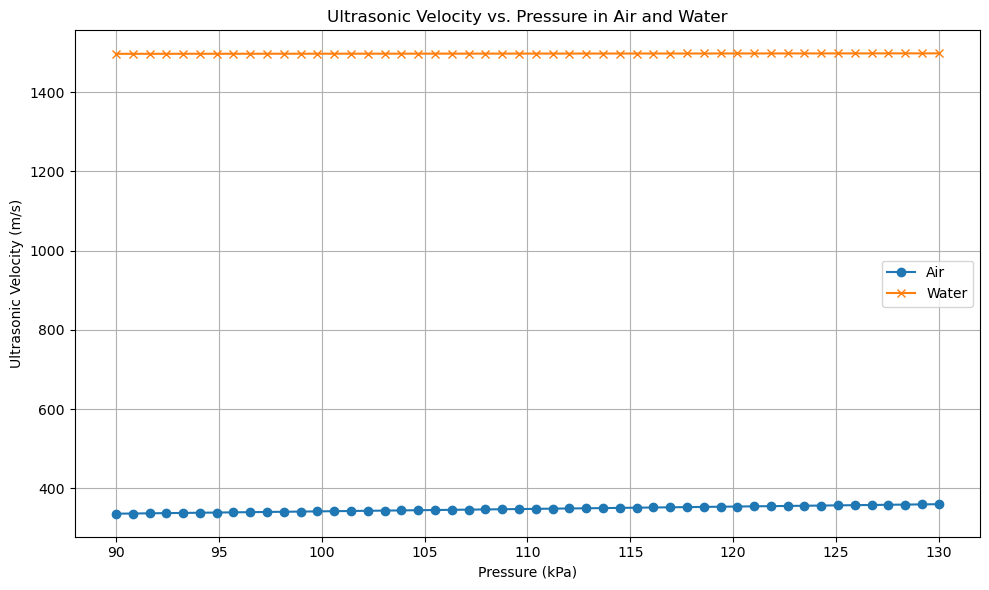

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
initial_density_air = 1.225  # kg/m^3 at standard conditions (sea level)
initial_density_water = 1000  # kg/m^3
initial_velocity_air = 343  # m/s at standard conditions
initial_velocity_water = 1497  # m/s at standard conditions

k_P_air = 0.6  # Velocity change per kPa
k_P_water = 0.03  # Velocity change per kPa

def ultrasonic_velocity_air(P):
    return initial_velocity_air + k_P_air * (P - 101.325)

def ultrasonic_velocity_water(P):
    return initial_velocity_water + k_P_water * (P - 101.325)

pressures = np.linspace(90, 130, 50)  # From 90 kPa to 130 kPa

velocities_air = [ultrasonic_velocity_air(P) for P in pressures]
velocities_water = [ultrasonic_velocity_water(P) for P in pressures]

# Create DataFrame for plotting
df = pd.DataFrame({
    "Pressure (kPa)": pressures,
    "Ultrasonic Velocity Air (m/s)": velocities_air,
    "Ultrasonic Velocity Water (m/s)": velocities_water
})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df["Pressure (kPa)"], df["Ultrasonic Velocity Air (m/s)"], label='Air', marker='o')
ax.plot(df["Pressure (kPa)"], df["Ultrasonic Velocity Water (m/s)"], label='Water', marker='x')

ax.set_xlabel('Pressure (kPa)')
ax.set_ylabel('Ultrasonic Velocity (m/s)')
ax.set_title('Ultrasonic Velocity vs. Pressure in Air and Water')
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


### Attenuation Coefficient vs. Sugar Concentration

This plot shows the relationship between the attenuation coefficient and sugar concentration in water. The attenuation coefficient quantifies how much the amplitude of ultrasonic waves decreases per unit distance.

#### Key Principles:
- **Attenuation Coefficient (\(\alpha\))**: Expressed in decibels per meter (dB/m), it quantifies the energy loss of ultrasonic waves in the medium.
- **Factors Influencing Attenuation**:
  - **Viscosity**: Higher viscosity leads to greater energy loss due to internal friction.
  - **Scattering**: Increased solute concentration causes more scattering of the ultrasonic waves.
  - **Absorption**: Energy is absorbed by the medium and converted into heat.

The attenuation coefficient is modeled as a linear function of sugar concentration:
\[
\alpha = \alpha_0 + k \cdot G
\]
where:
- \(\alpha_0\) is the baseline attenuation coefficient for pure water.
- \(k\) is the concentration coefficient.
- \(G\) is the sugar concentration.

The following plot shows the attenuation coefficient for different sugar concentrations.


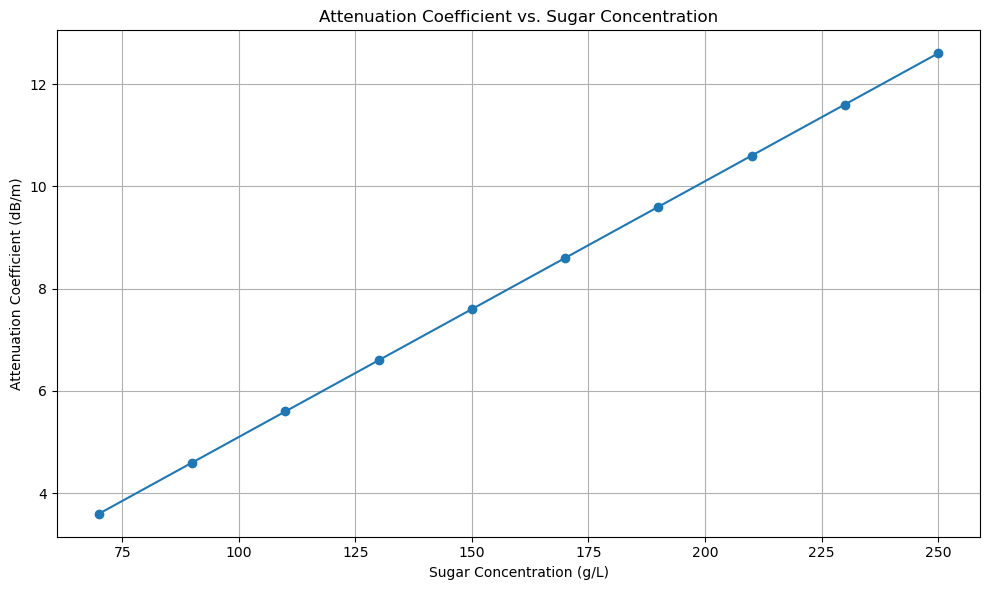

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
alpha_0 = 0.1  # Baseline attenuation coefficient for pure water (dB/m)
k = 0.05  # Attenuation coefficient per unit concentration (dB/(m·g/L))

# Function to calculate attenuation coefficient
def attenuation_coefficient(G):
    return alpha_0 + k * G

# Define sugar concentrations in g/L
sugar_concentrations_g_per_L = np.array([70, 90, 110, 130, 150, 170, 190, 210, 230, 250])

# Generate data for attenuation coefficients
attenuations = attenuation_coefficient(sugar_concentrations_g_per_L)

# Create a DataFrame for plotting
df = pd.DataFrame({
    "Sugar Concentration (g/L)": sugar_concentrations_g_per_L,
    "Attenuation Coefficient (dB/m)": attenuations
})

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df["Sugar Concentration (g/L)"], df["Attenuation Coefficient (dB/m)"], marker='o')

ax.set_xlabel('Sugar Concentration (g/L)')
ax.set_ylabel('Attenuation Coefficient (dB/m)')
ax.set_title('Attenuation Coefficient vs. Sugar Concentration')

plt.grid(True)
plt.tight_layout()
plt.show()

